# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan didapatkan dari Kaggle yang dapat diakses pada link berikut:
https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [162]:
#Type your code here

df = pd.read_csv('earthquake_data_tsunami.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [163]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [164]:
df.head(5)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

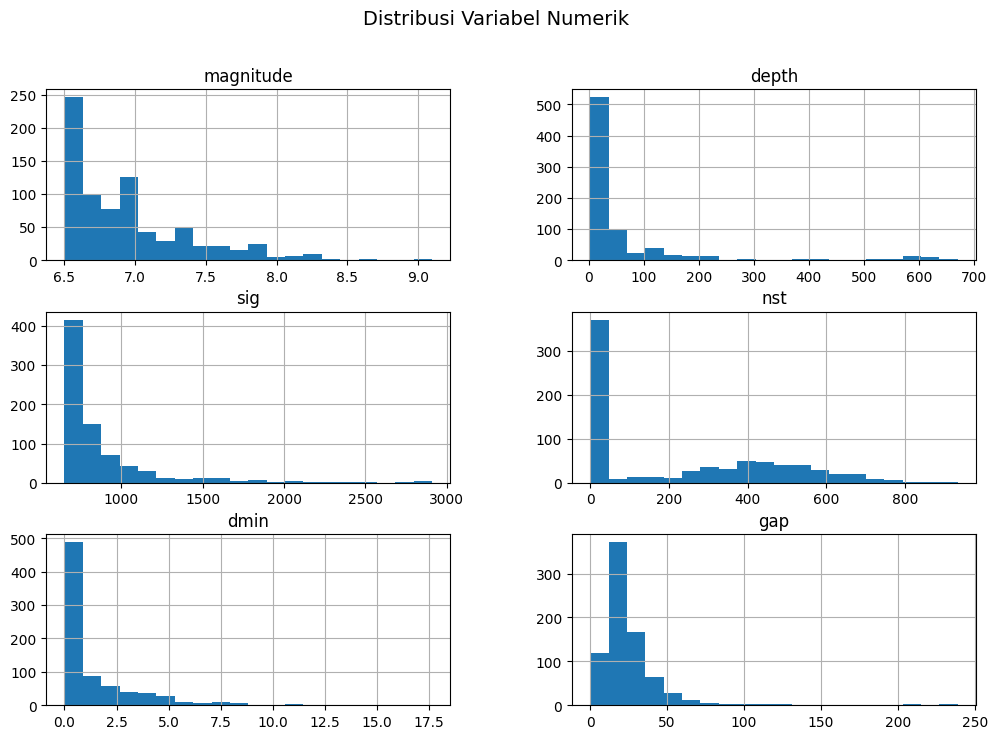

In [165]:
#Type your code here

numeric_cols = ['magnitude', 'depth', 'sig', 'nst', 'dmin', 'gap']

df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

Visualisasi ini menampilkan distribusi enam variabel numerik (magnitude, depth, sig, nst, dmin, dan gap) yang masing-masing merepresentasikan karakteristik kejadian gempa bumi. Secara umum, seluruh variabel menunjukkan distribusi yang condong ke kanan (right-skewed), menandakan sebagian besar data berada pada nilai kecil dengan sedikit data ekstrem (outlier) pada nilai besar.

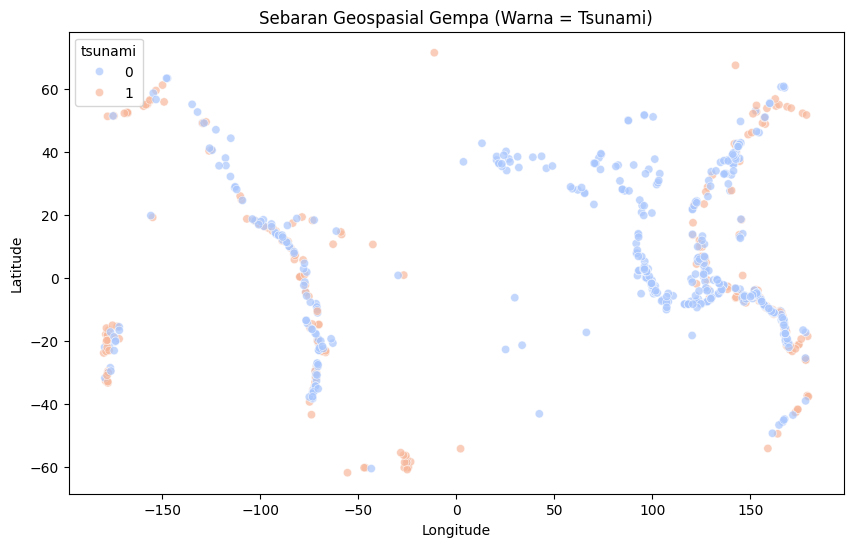

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='longitude', y='latitude',
    hue='tsunami', palette='coolwarm', alpha=0.7
)
plt.title("Sebaran Geospasial Gempa (Warna = Tsunami)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Visualisasi di atas menunjukkan sebaran lokasi gempa bumi berdasarkan koordinat geografis (latitude dan longitude), dengan pewarnaan titik yang membedakan antara gempa yang menyebabkan tsunami dan yang tidak. Titik berwarna biru menandakan gempa tanpa tsunami, sedangkan titik oranye menandakan gempa yang disertai tsunami.

C:\Users\hp\AppData\Local\Temp\ipykernel_20196\751256596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tsunami', data=df, palette='coolwarm')


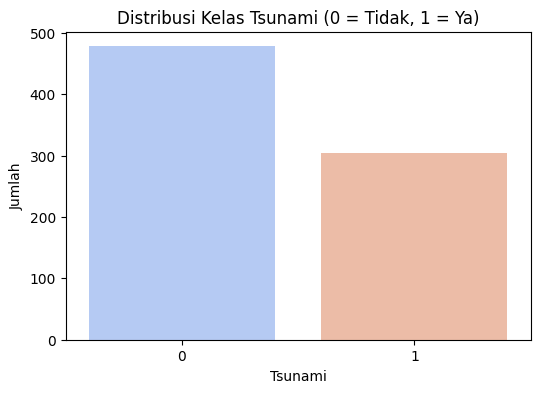

In [167]:
plt.figure(figsize=(6, 4))
sns.countplot(x='tsunami', data=df, palette='coolwarm')
plt.title("Distribusi Kelas Tsunami (0 = Tidak, 1 = Ya)")
plt.xlabel("Tsunami")
plt.ylabel("Jumlah")
plt.show()

Visualisasi di atas menunjukkan distribusi jumlah kejadian gempa berdasarkan kelas tsunami, dengan nilai 0 mewakili gempa yang tidak menyebabkan tsunami, dan 1 mewakili gempa yang menyebabkan tsunami.

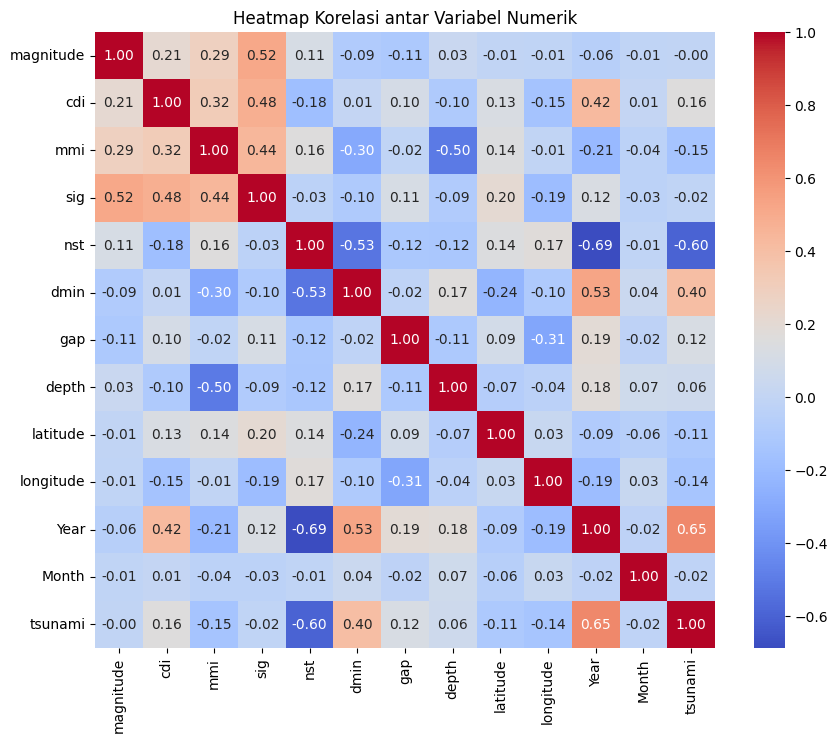

In [168]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Variabel Numerik")
plt.show()

Visualisasi di atas menunjukkan peta korelasi (heatmap) antara seluruh variabel numerik pada dataset gempa dan tsunami. Warna merah menunjukkan korelasi positif yang kuat, sedangkan warna biru menunjukkan korelasi negatif. Nilai korelasi berkisar antara -1 hingga 1, di mana nilai mendekati 1 berarti hubungan positif kuat, sedangkan mendekati -1 berarti hubungan negatif kuat.

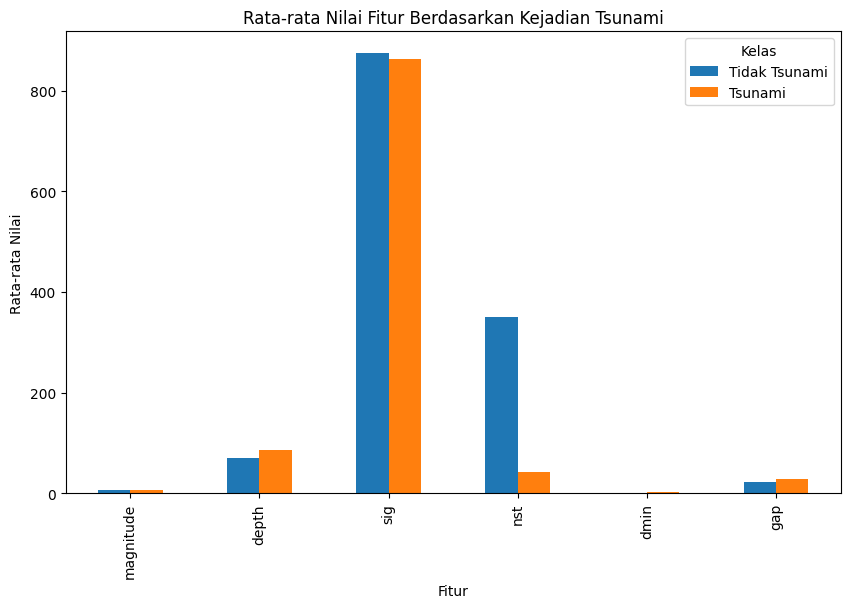

In [169]:
group_means = df.groupby('tsunami')[numeric_cols].mean().T
group_means.plot(kind='bar', figsize=(10, 6))
plt.title("Rata-rata Nilai Fitur Berdasarkan Kejadian Tsunami")
plt.ylabel("Rata-rata Nilai")
plt.xlabel("Fitur")
plt.legend(["Tidak Tsunami", "Tsunami"], title="Kelas")
plt.show()

Grafik di atas menunjukkan rata-rata nilai beberapa fitur numerik berdasarkan kejadian tsunami, dengan dua kategori:

🟦 Tidak Tsunami (0)

🟧 Tsunami (1)

Setiap batang merepresentasikan nilai rata-rata dari masing-masing fitur utama (magnitude, depth, sig, nst, dmin, dan gap) pada kedua kelas tersebut.

C:\Users\hp\AppData\Local\Temp\ipykernel_20196\3856853239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, ax=axes[0], palette='crest')
C:\Users\hp\AppData\Local\Temp\ipykernel_20196\3856853239.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, ax=axes[1], palette='flare')


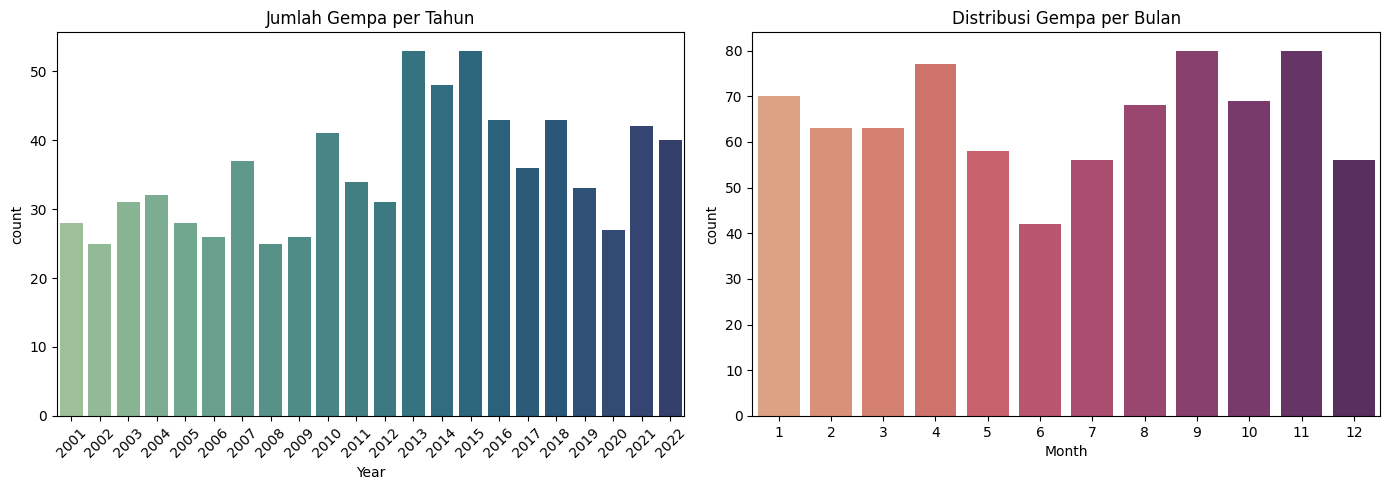

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Year', data=df, ax=axes[0], palette='crest')
axes[0].set_title("Jumlah Gempa per Tahun")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='Month', data=df, ax=axes[1], palette='flare')
axes[1].set_title("Distribusi Gempa per Bulan")
plt.tight_layout()
plt.show()

- Aktivitas gempa bumi dari tahun 2001–2022 menunjukkan pola fluktuatif, dengan puncak kejadian pada periode 2012–2016.

- Berdasarkan bulan, gempa tidak menunjukkan pola musiman yang tetap, namun beberapa bulan seperti April, September, dan November relatif lebih sering mengalami kejadian gempa.

- Secara keseluruhan, hasil ini menegaskan bahwa aktivitas seismik di wilayah studi bersifat dinamis dan tersebar sepanjang waktu, mencerminkan karakter alami sistem tektonik bumi yang kompleks.

C:\Users\hp\AppData\Local\Temp\ipykernel_20196\2523350468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tsunami', y='magnitude', data=df, ax=axes[0], palette='coolwarm')
C:\Users\hp\AppData\Local\Temp\ipykernel_20196\2523350468.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tsunami', y='depth', data=df, ax=axes[1], palette='coolwarm')


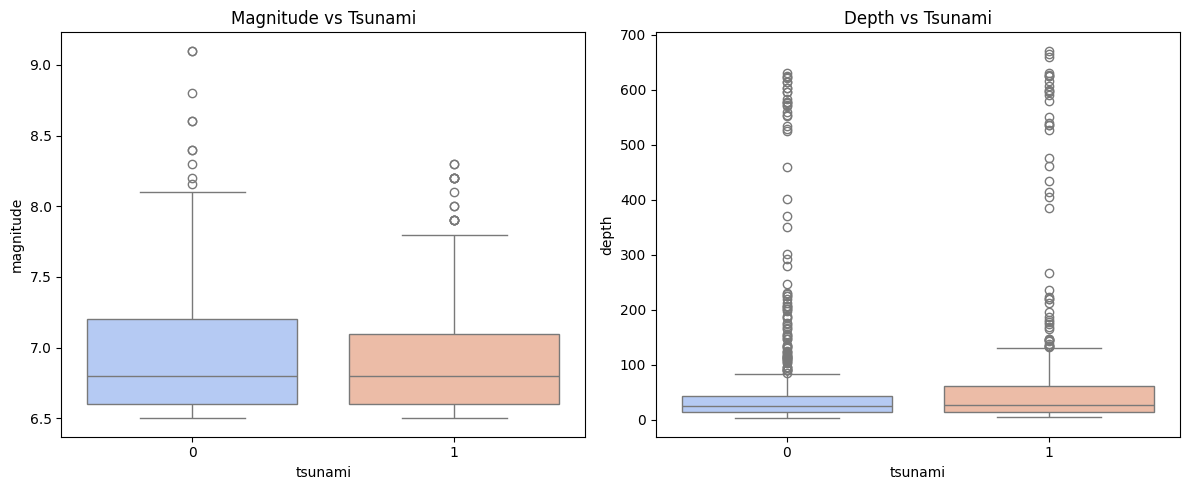

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='tsunami', y='magnitude', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title("Magnitude vs Tsunami")

sns.boxplot(x='tsunami', y='depth', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title("Depth vs Tsunami")

plt.tight_layout()
plt.show()

- Gempa dengan magnitudo besar tidak selalu memicu tsunami; faktor kedalaman gempa memiliki pengaruh yang lebih signifikan.

- Gempa dangkal (depth rendah) lebih sering berasosiasi dengan kejadian tsunami.

- Terdapat outlier pada kedua variabel yang menunjukkan adanya gempa ekstrem baik dari sisi kekuatan maupun kedalaman, namun sebagian besar tidak menimbulkan tsunami.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Menghapus data yang tidak diperlukan

In [172]:
df = df.drop(['Year', 'Month'], axis=1)

Kolom "Year" dihapus, sedangkan kolom "Month" dipertahankan karena diduga berkaitan dengan pola musiman kejadian.

### Cek Missing Value

In [173]:
missing_values = df.isnull().sum()

print(f"Jumlah nilai yang hilang di setiap kolom: \n{missing_values}")

Jumlah nilai yang hilang di setiap kolom: 
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
tsunami      0
dtype: int64


Tidak ada missing value, sehingga tidak perlu dilakukan penanganan

### Cek Duplikasi

In [174]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


Tidak ada duplikasi data, sehingga tidak perlu dilakukan penanganan

Data setelah normalisasi dengan Min-Max

### Deteksi dan Penanganan Outlier dengan Interquartile Range

In [175]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outlier ditemukan")

magnitude: 37 outlier ditemukan
cdi: 0 outlier ditemukan
mmi: 1 outlier ditemukan
sig: 73 outlier ditemukan
nst: 0 outlier ditemukan
dmin: 61 outlier ditemukan
gap: 48 outlier ditemukan
depth: 139 outlier ditemukan
latitude: 0 outlier ditemukan
longitude: 0 outlier ditemukan
tsunami: 0 outlier ditemukan


In [176]:
df['depth'] = winsorize(df['depth'], limits=[0.01, 0.01])

Deteksi outlier dengan interquartile range dan penanganan dilakukan dengan teknik Winsorize pada kolom "depth". Untuk kolom lain tetap dibiarkan untuk menjaga makna data

### Normalisasi Min-Max

In [177]:
df = (df - df.min()) / (df.max() - df.min())

print("Data setelah normalisasi Min-Max:")
print(df.head())

Data setelah normalisasi Min-Max:
   magnitude       cdi    mmi       sig       nst      dmin       gap  \
0   0.192308  0.888889  0.750  0.052212  0.125268  0.028832  0.071130   
1   0.153846  0.444444  0.375  0.037611  0.105996  0.126260  0.142259   
2   0.192308  0.333333  0.250  0.046460  0.157388  0.177014  0.075314   
3   0.307692  0.555556  0.500  0.080973  0.159529  0.105642  0.087866   
4   0.038462  0.000000  0.125  0.008850  0.140257  0.283109  0.112971   

      depth  latitude  longitude  tsunami  
0  0.012945  0.389963   0.944204      1.0  
1  0.030744  0.426226   0.780541      0.0  
2  0.927184  0.313138   0.004510      1.0  
3  0.050162  0.318825   0.021797      1.0  
4  1.000000  0.271604   0.996152      1.0  


In [178]:
df

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,tsunami
0,0.192308,0.888889,0.750,0.052212,0.125268,0.028832,0.071130,0.012945,0.389963,0.944204,1.0
1,0.153846,0.444444,0.375,0.037611,0.105996,0.126260,0.142259,0.030744,0.426226,0.780541,0.0
2,0.192308,0.333333,0.250,0.046460,0.157388,0.177014,0.075314,0.927184,0.313138,0.004510,1.0
3,0.307692,0.555556,0.500,0.080973,0.159529,0.105642,0.087866,0.050162,0.318825,0.021797,1.0
4,0.038462,0.000000,0.125,0.008850,0.140257,0.283109,0.112971,1.000000,0.271604,0.996152,1.0
...,...,...,...,...,...,...,...,...,...,...,...
777,0.461538,0.000000,0.875,0.115929,0.457173,0.000000,0.000000,0.087379,0.561115,0.253894,0.0
778,0.153846,0.555556,0.750,0.042035,0.000000,0.000000,0.000000,0.049191,0.888696,0.074207,0.0
779,0.230769,0.000000,0.750,0.055752,0.398287,0.000000,0.000000,0.156958,0.351517,0.965264,0.0
780,0.115385,0.000000,0.500,0.026991,0.068522,0.000000,0.000000,0.043689,0.513033,0.853285,0.0


### Cek Data Kategorikal

In [179]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Kolom kategorikal:")
print(categorical_cols)

Kolom kategorikal:
Index([], dtype='object')


Tidak ada data bertipe kategorikal, sehingga tidak perlu dilakukan penanganan